<a href="https://colab.research.google.com/github/rcarvajal208/MachineLearning_Retos/blob/master/Robotica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import RANSACRegressor
from matplotlib import pyplot as plt 
import math 
import os

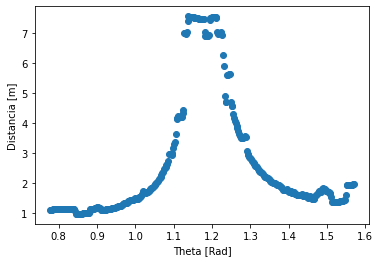

(361,)


In [2]:
pi = math.pi 
laserdata = np.loadtxt('laserscan.dat' ) 
s = len(laserdata)
thetaInicial = pi/4 - pi/s
thetaFinal = pi/2
theta = np.linspace(start=thetaInicial, stop=thetaFinal, num=len(laserdata))
plt.scatter(theta, laserdata)
plt.ylabel('Distancia [m]')
plt.xlabel('Theta [Rad]')
plt.show()
print(theta.shape)

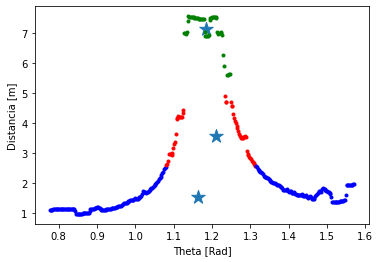

In [3]:
X = np.array(list(zip(theta, laserdata)))
numeroGrupos = 3
kmeans = KMeans(n_clusters=numeroGrupos)
kmeans = kmeans.fit(X)
etiquetas = kmeans.labels_
centroides = kmeans.cluster_centers_
colores = ['r.', 'b.', 'g.', 'c.', 'm.', 'y.', 'k.', 'w.'] 
i = 0
while(i < len(X)):
  plt.plot(X[i][0],X[i][1], colores[etiquetas[i]])
  i += 1
plt.scatter(centroides[:,0], centroides[:,1], marker='*', s=200)
plt.ylabel('Distancia [m]')
plt.xlabel('Theta [Rad]')
plt.show()

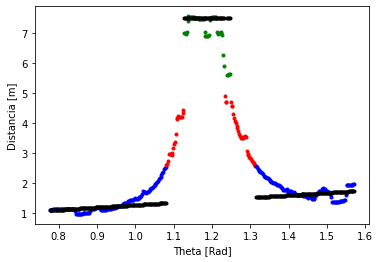

In [4]:
i = 0
while(i < len(X)):
  plt.plot(X[i][0],X[i][1], colores[etiquetas[i]])
  i += 1
j = 0
while(j<numeroGrupos):
  y = np.array([])
  x = np.array([]) 
  i = 0
  while(i < len(X)):
    if(j == etiquetas[i]):
      x = np.append(x, X[i][0]) 
      y = np.append(y, X[i][1])
    i += 1
  xx = x[:, np.newaxis]
  reg = RANSACRegressor(random_state=0).fit(xx, y)
  coef = reg.estimator_.coef_[0] 
  y = reg.predict(xx)
  if(abs(coef) < 5):
    plt.plot(x, y, 'k.')
  j += 1
plt.ylabel('Distancia [m]')
plt.xlabel('Theta [Rad]')
plt.show()